In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Assignment 2 Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
x = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [6]:
para =  {
    "n_neighbors": np.arange(1,21,2), #odd values of k from 1 to 20
    "weights": ["uniform", "distance"], 
    "metric": ["eucledian", "manhattan", "minkowski"]
}

In [7]:
knn = KNeighborsRegressor()

In [8]:
knn_reg=GridSearchCV(KNeighborsRegressor(),para,cv=10)

In [ ]:
knn_reg.fit(x_train,y_train)

c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['eucledian', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [10]:
knn_reg.best_score_

np.float64(0.9073938897274191)

In [11]:
knn_reg.best_params_

{'metric': 'minkowski', 'n_neighbors': np.int64(3), 'weights': 'distance'}

In [12]:
best_knn = KNeighborsRegressor(**knn_reg.best_params_)
best_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=np.int64(3), weights='distance')

In [13]:
y_pred = best_knn.predict(x_test)

In [14]:
r2_score(y_test, y_pred)

0.9406984898209871

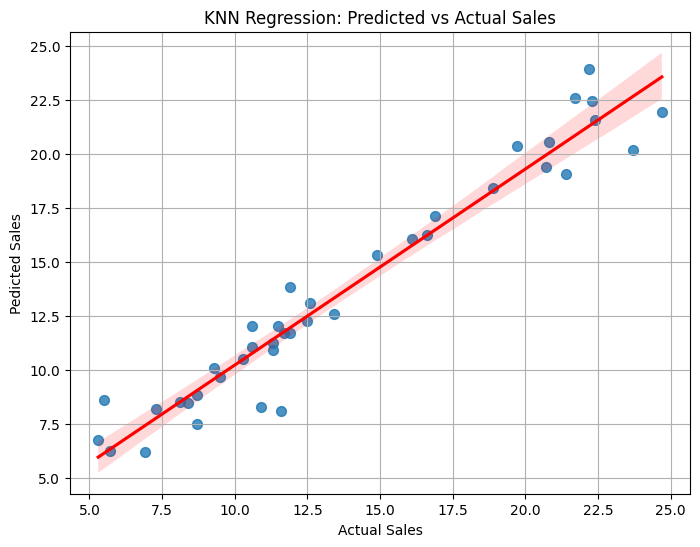

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s":50}, line_kws={"color": "red"})
plt.xlabel('Actual Sales')
plt.ylabel('Pedicted Sales')
plt.title("KNN Regression: Predicted vs Actual Sales")
plt.grid(True)
plt.show()